In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

In [2]:
# FUNCTIONS

def path(folder,n_file):
    n_file_str = str(n_file).zfill(3)
    file_path = str(r"C:\Users\rjnar\Documents\NIP\BS-Thesis\III - EEG Analysis\\" + str(folder) + r"\\" + str(folder) + n_file_str + '.txt')
    return file_path

def extract(file_path):
    with open(file_path, 'r') as file:
        data = [ int(line.strip()) for line in file]
    return data

# GLOBAL FORMATS
def analyze_folder(folder):                         # Main Function
    data = []                                       # extracts the folder into a csv
    for i in range(1,101):
        name = path(folder,i)
        data.append( extract(name) )
    return data


In [3]:
# Conventions, Customs, Data

y_modifiers = []
for i in range(100):
    y_modifiers.append(i*200)
print(y_modifiers)

folder_names = {
    "Z":"Z",
    "O":"O",
    "N":"N",
    "F":"F",
    "S":"S"
}

folder_mapping = {
    "Z":"A",
    "O":"B",
    "N":"C",
    "F":"D",
    "S":"E"
}

# Time index
time_index = np.arange(4097)
print(time_index)

# Folders
folder_list = ["Z","O","N","F","S"]


[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400, 17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200, 19400, 19600, 19800]
[   0    1    2 ... 4094 4095 4096]


In [15]:

def EEGram(folder):
    data = analyze_folder(folder_names[folder])             # Data is a 2D List, not array
    run = 0
    
    fig , axs = plt.subplots(1,1, figsize=(40,100))
    fig.suptitle(f"EEGram for Set {folder_names[folder]}({folder_mapping[folder]}), Rwen Narvarte", fontsize=128)
    axs.set_ylim(-100,20000)
    fig.tight_layout(rect=[0, 0, 1, 0.98])

    for i in range(100):
        series = np.array(data[run])                        # Converted the list to a 1D array for faster runtime
        mean_series = round(np.mean(series))                # Get mean of series
        dy = y_modifiers[i] - mean_series                   # distance between correct height vs current height
        corrected_series = series + dy                      # correcting the height

        corrected_mean = round(np.mean(corrected_series))
        corrected_series_mean = [corrected_mean] * len(corrected_series)
        
        axs.plot(time_index, corrected_series_mean, color='black')
        axs.plot(time_index, corrected_series, color='tab:blue')
        
        run += 1

    plt.savefig(f'{folder_mapping[folder]}_EEGram', dpi=72)

In [ ]:
for folder in folder_list:
    EEGram(folder_names[folder])

### FRD

In [8]:
data = analyze_folder(folder_list[0])
data = data[0]

print(len(FRD(data)[0]))

247


In [9]:
def FRD(data):
    frequency_map = Counter(data)                   # Counter is from Collections library
    sorted_items = frequency_map.most_common()      # Counter is used to call key-value pairs (like a dictionary)
                                                    # most_common() sorts the key0value pair based on frequency

    voltage, frequency = zip(*sorted_items)         # ZIP(*data) separates the tuples
    return voltage, frequency

In [14]:
def FRD_plot(folder):
    data = analyze_folder(folder_names[folder])             # Data is a 2D List, not array
    run = 0
    
    fig , axs = plt.subplots(21,5, figsize=(24,48))         # In figsize(length,height)
    fig.suptitle(f"FRD for Set {folder_names[folder]}({folder_mapping[folder]}), Rwen Narvarte")

    for row in range(20):
        for col in range(5):
            series = np.array(data[run])
            voltage, frequency = FRD(series)
            ranking = np.linspace(1, len(frequency), len(frequency))

            axs[row][col].scatter(ranking,frequency)

            run += 1
    plt.savefig(f'{folder_mapping[folder]}_FRD', dpi=72)


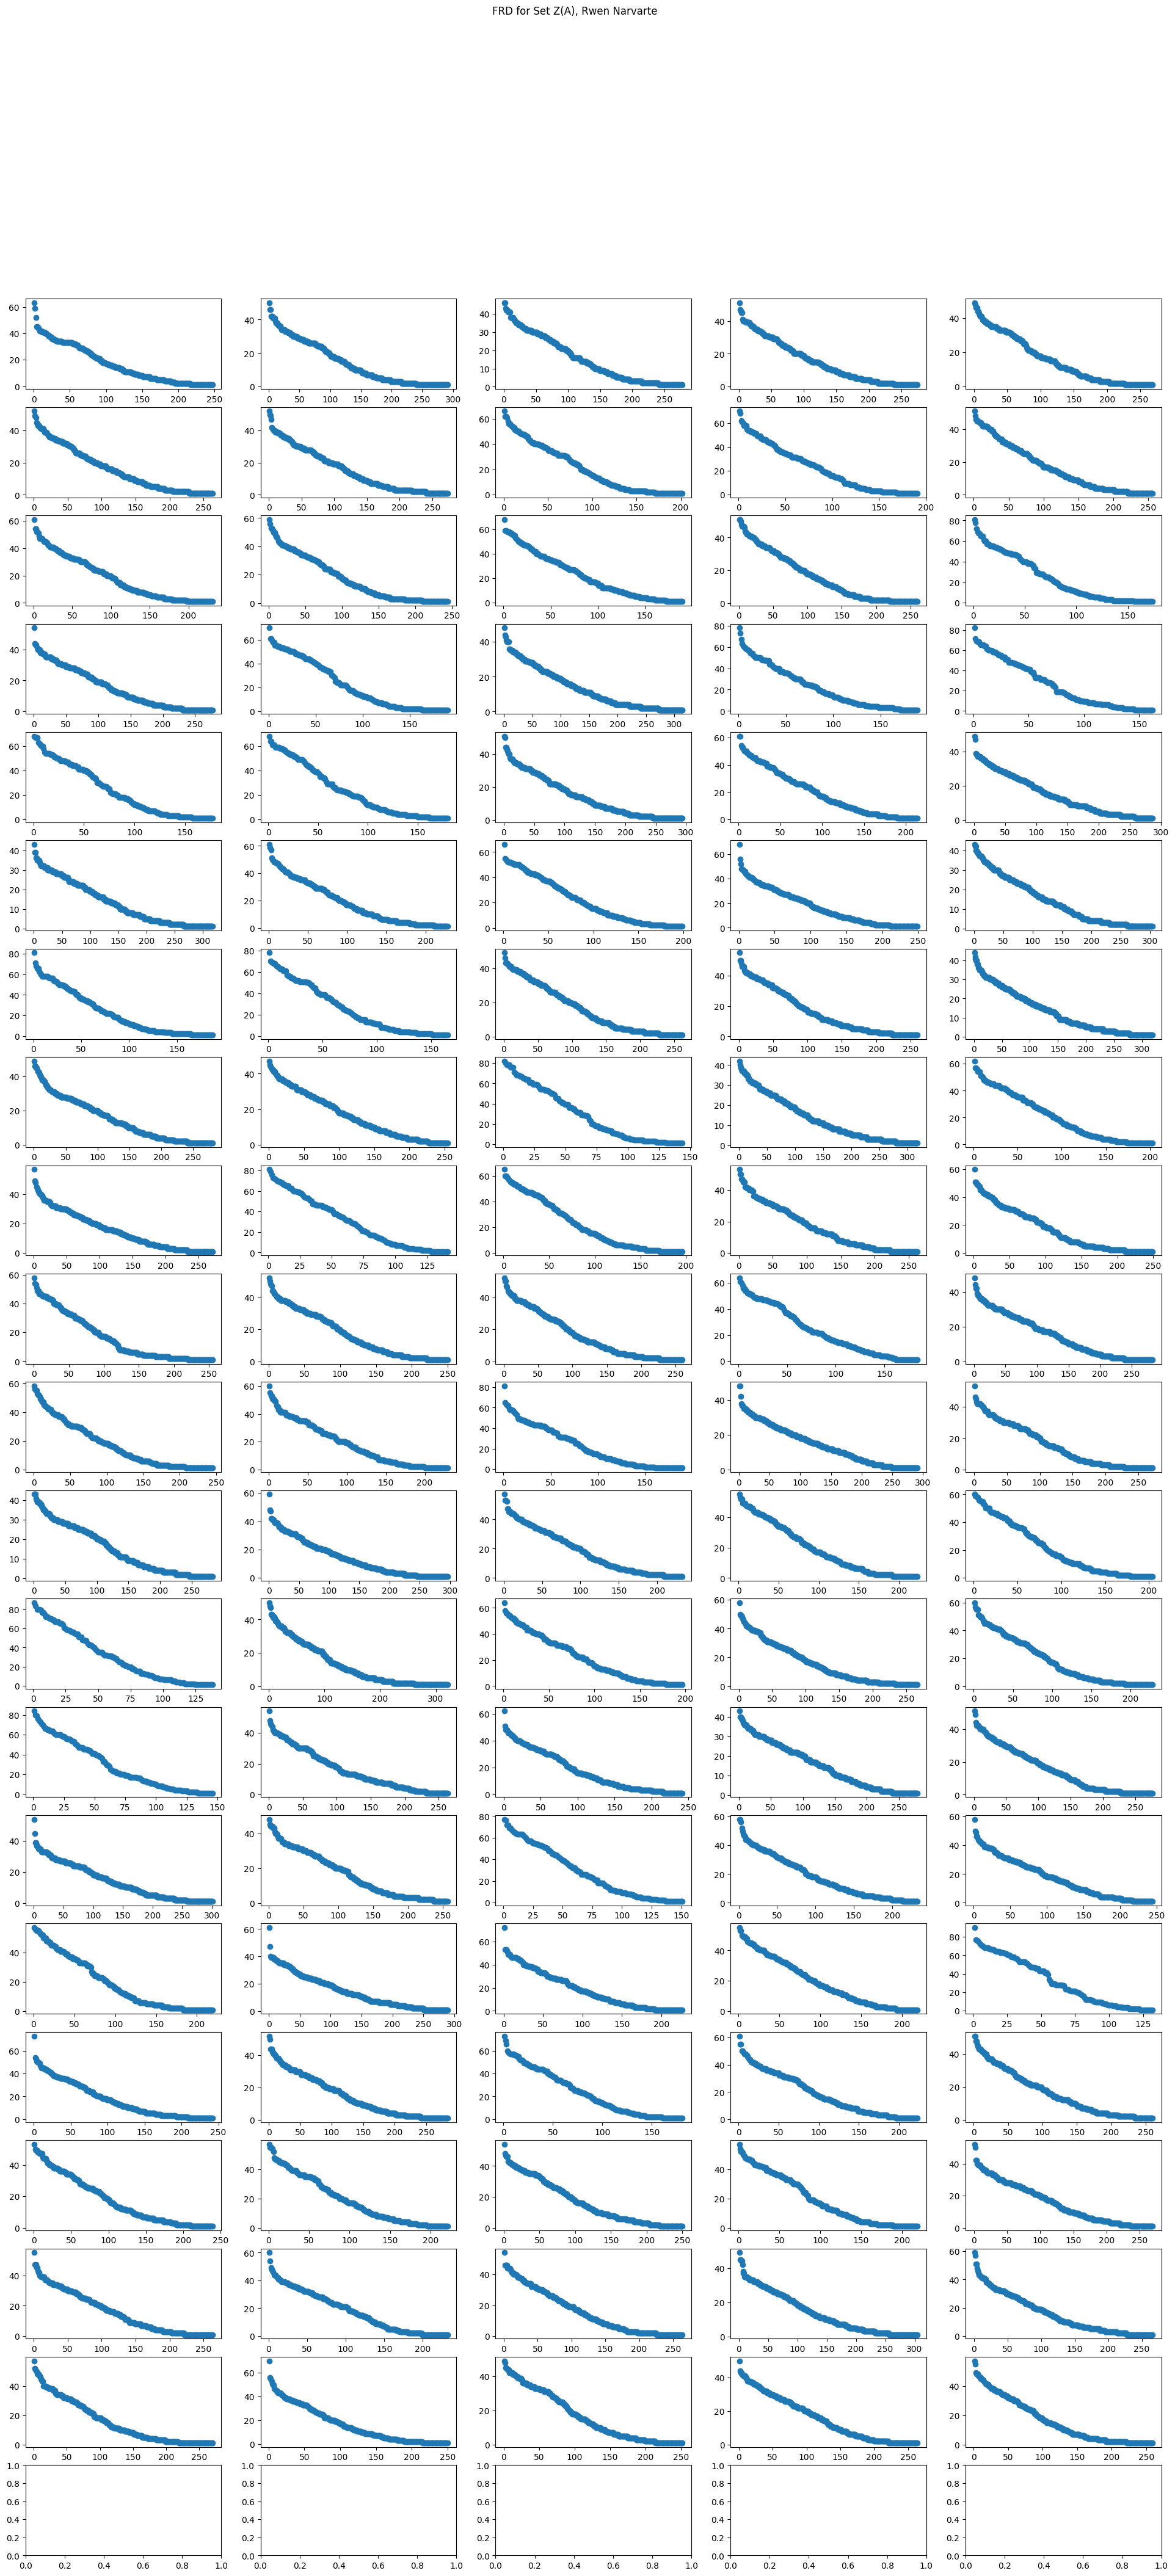

In [15]:
FRD_plot(folder_names[folder_list[0]])